In [1]:
from sklearn.datasets import make_regression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

X, y, answer = make_regression(1500, 3,bias=100, noise=20, coef=True)
answer = np.append( answer, 100)

print(f"data shape {X.shape}\npweight {answer} bias {100}")

data shape (1500, 3)
pweight [ 66.73038125  59.96547616  15.06153759 100.        ] bias 100


<br></br><br></br><br></br>

__경사하강법 구현__

In [2]:
def log_plot(log):
    sns.lineplot(x = np.arange(0,len(log)), y= log)
    plt.show()
    
def compare(beta_gd):
    return np.sqrt(sum((y - (X @ beta_gd[:-1] + beta_gd[-1]))**2))
    
def gd(X,y,epoch):
    global log
    log = []
    X_ = np.array([ np.append(x,[1]) for x in X])
    beta_gd = np.random.random_sample(4)

    for t in range(epoch):
        error = y - (X_ @ beta_gd)
        grad = - np.transpose(X_) @ error
        beta_gd = beta_gd - 0.001 * grad
        log.append(np.linalg.norm(answer - beta_gd))
    return beta_gd



In [3]:
w_ =gd(X,y,epoch = 100)
print(f"coef {answer}\npredicted_coef {w_}")
print(f"MSE : {compare(w_)}")

coef [ 66.73038125  59.96547616  15.06153759 100.        ]
predicted_coef [ 67.22360297  60.44659245  15.08114719 100.03645116]
MSE : 749.4625160492526


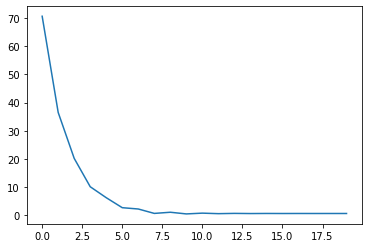

In [4]:
log_plot(log[:20])

<br></br><br></br>

__확률적 경사하강법 SGD ( 1개 데이터만 )__

In [5]:
ß∑def get_batch():
    for i in range(len(X)):
        yield np.append(X[i],1) ,y[i]
        
    
def SGD(X,y,epoch):
    global log
    log = []
    beta_gd = np.random.random_sample(4)
    
    for e in range(epoch):
        batch = get_batch()
        
        for _ in range(len(X)): # 데이터 가져오기
            X_,y = next(batch)
            
            
            error = y - (X_ @ beta_gd)
            grad = - np.transpose(X_) * error
            beta_gd = beta_gd - 0.001 * grad
            log.append(np.linalg.norm(answer - beta_gd))
    return beta_gd


In [6]:
w_ = SGD(X,y,100)
print(f"coef {answer}\npredicted_coef {w_}")
print(f"MSE : {compare(w_)}")

coef [ 66.73038125  59.96547616  15.06153759 100.        ]
predicted_coef [ 66.89712799  60.11256379  15.04102654 100.0006898 ]
MSE : 749.683298683751


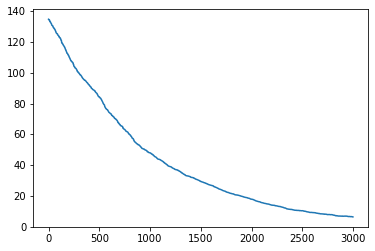

In [7]:
log_plot(log[:3000])

<br></br><br></br>

__mini batch GD__

In [22]:
def get_batch(batch_size):
    for t in np.arange(0,len(X),batch_size):
        yield np.hstack( [ X[t:t+batch_size,:], [[1] for i in range(batch_size)]] ) ,y[t:t+batch_size]
 
        
    
def mini_batch_SGD(X,y,epoch,batch_size):
    global log 
    log = []
    beta_gd = np.random.random_sample(4)
    
    for e in range(epoch): # epoch 구간
        batch = get_batch(batch_size) 
        while True:
            
            try:
                X_,y_ = next(batch) # batch 가져오기
            except StopIteration as e:
                break
            
            # 오차 계산 및 가중치 업데이트
            error = y_ - (X_ @ beta_gd)
            grad = - np.transpose(X_) @ error / len(X_)
            beta_gd = beta_gd - 0.001 * grad
            
            # log 더하기
            log.append(np.linalg.norm(answer - beta_gd))
    return beta_gd

In [26]:
w_ = mini_batch_SGD(X,y,1000,100)

In [27]:
print(f"coef {answer}\npredicted_coef {w_}")
print(f"MSE : {compare(w_)}")

coef [ 66.73038125  59.96547616  15.06153759 100.        ]
predicted_coef [ 67.22018804  60.44337621  15.08050592 100.03621369]
MSE : 749.4625383538728


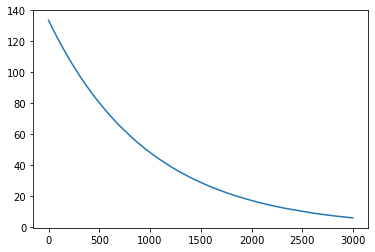

In [37]:
log_plot(log[:3000])